# IMPORTING THE AstraZeneca DATA-SET 
* The following data-set consist of tweets from the month of 'January' to the month of 'May'based on the keyword [Johnson&Johnson]  which has been scrapped from twitter  using the library called snscrape
* Our scrapped data consist of the Url, date of the tweet, tweet_content, tweet_id
* For our Analysis we will be only making use of the tweet content inorder to get the sentiment Analysis for the given time duration 



In [52]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AstraZeneca_tweets_01-05.csv',low_memory=False)
df

,Unnamed: 0,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,0,snscrape.modules.twitter.Tweet,https://twitter.com/PedroRNunes/status/1345157...,2021-01-01 23:59:49+00:00,@UrbanNathalia Possível que seja antes. por is...,@UrbanNathalia Possível que seja antes. por is...,1345157813350359041,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,0,1345155340468445185,pt,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,1.345155e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
1,1,1,snscrape.modules.twitter.Tweet,https://twitter.com/KBSeauxluxe/status/1345157...,2021-01-01 23:59:12+00:00,AstraZeneca may be our saving grace in 2021...,AstraZeneca may be our saving grace in 2021...,1345157659884978180,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1345157659884978180,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,snscrape.modules.twitter.Tweet,https://twitter.com/Axulon/status/134515760952...,2021-01-01 23:59:00+00:00,"@jdabal La vacuna rusa está en fase 3, igual q...","@jdabal La vacuna rusa está en fase 3, igual q...",1345157609528184834,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,0,1345122701191630848,es,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.345155e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
3,3,3,snscrape.modules.twitter.Tweet,https://twitter.com/Yavuz94999594/status/13451...,2021-01-01 23:58:57+00:00,@DrNecmettinUnal Oxford AstraZeneca \n ACIL DU...,@DrNecmettinUnal Oxford AstraZeneca \n ACIL DU...,1345157598350344196,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1345155830509948928,tr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,['https://www.astrazeneca.com/media-centre/pre...,['https://t.co/l66JSegddc'],NaN,NaN,NaN,1.345156e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
4,4,4,snscrape.modules.twitter.Tweet,https://twitter.com/WithEternityIM/status/1345...,2021-01-01 23:58:18+00:00,@GrabtharsHamme2 @Simpsonreport @NoMoreElitist...,@GrabtharsHamme2 @Simpsonreport @NoMoreElitist...,1345157434470510592,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1345022413675909121,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.345047e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,13995,495,snscrape.modules.twitter.Tweet,https://twitter.com/desinfos/status/1356015833...,2021-01-31 23:05:43+00:00,Une simple astuce sur Acrobat Reader révèle le...,Une simple astuce sur Acrobat Reader révèle le...,1356015833886191618,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1356015833886191618,fr,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,['https://www.bfmtv.com/tech/une-simple-astuce...,['https://t.co/o8w8kXfPyb'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,13996,496,snscrape.modules.twitter.Tweet,https://twitter.com/ChannelOzz/status/13560158...,2021-01-31 23:05:38+00:00,Two more weeks till Canada approves Astrazenec...,Two more weeks ti

# The tweet_content which we want to deal  with 

In [53]:
df = df[df["lang"]== 'en']


In [54]:
df['content']

1           AstraZeneca may be our saving grace in 2021...
4        @GrabtharsHamme2 @Simpsonreport @NoMoreElitist...
9        HT @patrickseurre for pointing to the @CDCgov ...
13       “About two million doses of Covid-19 vaccine d...
14       @somewherein84 In terms of a rollout. Depends ...
                               ...                        
69990    @guardian "Asked if the EU could refuse to mak...
69994    @reb_femme @joule162534 @juanmartinez877 @vond...
69996    Two more weeks till Canada approves Astrazenec...
69997    @vonderleyen @AstraZeneca Boom!...thats what t...
69998    @vonderleyen @AstraZeneca Looks like they won ...
Name: content, Length: 28082, dtype: object

# DATA ANALYSIS

In [55]:
!pip install texthero


# We  use text Hero Package so that we can get a count of the most recurrent words in the all the scrapped tweets 

* From the given count we can see that word Pfizer seems to be having the highest count amoung all the tweets from our data-set
* This provides us an overview of the data which is not cleaned 

In [56]:
import numpy as np
import pandas as pd
from copy import deepcopy

import texthero as hero
hero.top_words(df['content'].pipe(hero.clean))

astrazeneca       29275
co                16520
https             16463
vaccine           15762
covid              5688
                  ...  
mxfrknci1k            1
sirpareshrawal        1
hkookie               1
embassies             1
mazsangha             1
Name: content, Length: 46102, dtype: int64

## With the help of WordCloud we can visualize the most occuring words in our data-set based on the size of the word (Greater the size of the word greater is its occurance)
* From the given visualization we can see  that the most occuring word appears to be Delta Variant although the  data-set is not fully cleaned.

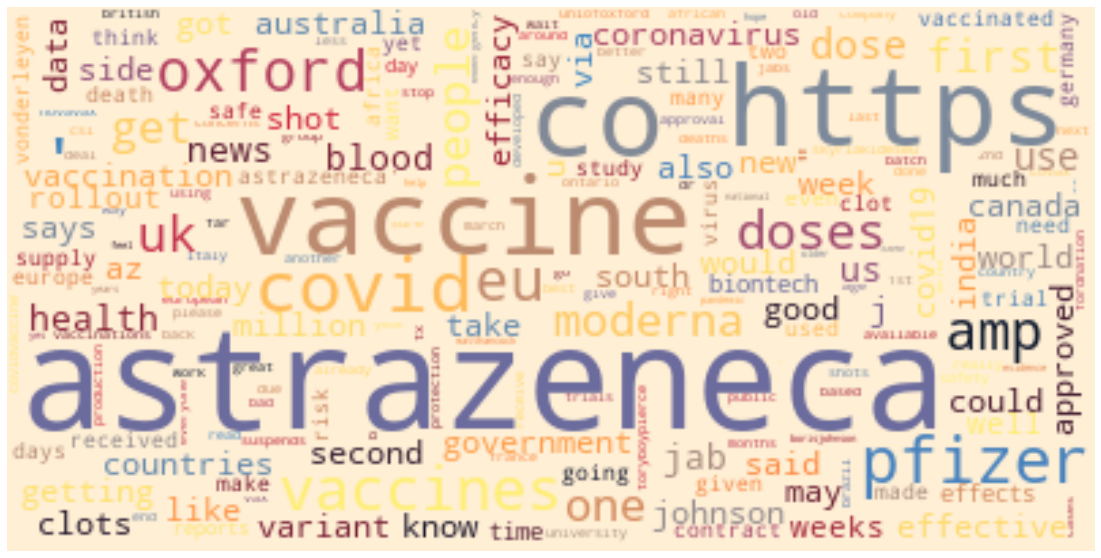

In [57]:
hero.wordcloud(df['content'].pipe(hero.clean))

# DATA PREPROCESSING (CLEANING)

---



In [58]:
!pip install clean-text


## In this step we are cleaning newline '\n' from the tweets 

In [59]:
import html
for i in range (len(df['content'])):

  x = df['content'].replace('\n','') #cleaning newline “\n” from the tweets
df['content'][i] = html.unescape(x)
df['content'].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        AstraZeneca may be our saving grace in 2021...
4     @GrabtharsHamme2 @Simpsonreport @NoMoreElitist...
9     HT @patrickseurre for pointing to the @CDCgov ...
13    “About two million doses of Covid-19 vaccine d...
14    @somewherein84 In terms of a rollout. Depends ...
15    @indiantweeter No way it was Mughals.\n\nOur R...
16    @DamianGoodOmen @JGBartholomew @AstraZeneca Do...
17    @samutsakhonjeff @SLerac AstraZeneca vaccine j...
19    @samutsakhonjeff @SLerac That's the latest I c...
26    Watch “India approves the AstraZeneca COVID-19...
Name: content, dtype: object

# Importing NLTK libraries like stopwards and word_tokenize to perform the following Pre-Processng Tasks 
* Lowercasing all your letters 
* Removing hashtags, mentions, and links
* Punctuations removal (including filtering non-alphanumeric characters if necessary)
* Tokenization
* Stop words removal

In [60]:
df['content']=df['content'].str.lower()
tweet=df['content'].values.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
import pandas as pd
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
 
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

# Stemming the data 

In [50]:

import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(str(tweet))
ps = PorterStemmer()
for w in tweet:
	rootWord=ps.stem(w)
	print(rootWord)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Streaming output truncated to the last 5000 lines.
@domme_laura @raskoftreve1 @matthancock i don’t understand why there are 300 parents putting their children up for the astrazeneca things trials! how can they do it? 🤷🏻‍♀️
concerning data about oxford/astrazeneca vaccine efficacy against the variant identified in south africa (sa has paused the rollout of this particular vaccine) https://t.co/lnwzorqiki
covid: oxford-astrazeneca vaccine to be tested on children https://t.co/1b3oqkviqj
@larainenewman i had this on the first shot of the astrazeneca
#oxford has launched a study to assess safety &amp; immune response of the #covid19 vaccine it has developed with #astrazeneca in children for the 1st time.

the mid-stage trial will determine whether the vaccine is effective on people between ages of 6 &amp; 17

https://t.co/yhfmxqw4gc
even if young generations have less possibility that the symptoms get worse, in fact some young people have died from the virus. so, it can't be ignored and so

AttributeError: ignored

## Llemmatization of tweets 

In [61]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

tokenization = nltk.word_tokenize(str(tweet))
for w in tokenization:

	print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Streaming output truncated to the last 5000 lines.
Lemma for .\nit is .\nit
Lemma for urged is urged
Lemma for the is the
Lemma for `` is ``
Lemma for preferential is preferential
Lemma for use is use
Lemma for of is of
Lemma for messenger is messenger
Lemma for rna is rna
Lemma for vaccines is vaccine
Lemma for in is in
Lemma for older is older
Lemma for and/or is and/or
Lemma for more is more
Lemma for frail is frail
Lemma for subjects is subject
Lemma for '' is ''
Lemma for .\ncdc is .\ncdc
Lemma for orders is order
Lemma for ' is '
Lemma for , is ,
Lemma for 'the is 'the
Lemma for jab is jab
Lemma for , is ,
Lemma for but is but
Lemma for germany\ is germany\
Lemma for 's is 's
Lemma for vaccine is vaccine
Lemma for commission is commission
Lemma for recommended is recommended
Lemma for against is against
Lemma for using is using
Lemma for it is it
Lemma for on is on
Lemma for older is older
Lemma for people is people
Lemma for amid is amid
Lemma for questions is question
Lemma for

In [13]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
results = [clean_tweet(tw) for tw in tweet]


# IMPORTING TEXTBLOB LIBRARY TO PERFORM SENTIMENT ANALYSIS 


In [14]:
from textblob import TextBlob

import tweepy 
import sys 

# In this step we are filtering out all  the '@usernames:' and then performing sentiment Analysis based on the Polarity of the tweets 
* The tweets which have polarity greater then 0 are classified to be having positive sentiments 
* The tweets which have polarity less then 0 are classified t be having negitive sentiments 
* The rest of the tweets are considered to be Neutral tweets 

In [15]:
polarity = 0 
positive = 0 
negitive = 0 
neutral = 0

for tweet in results :
  final_text = tweet.replace('RT','')
  if final_text.startswith('@'):
    position = final_text.index(':')
    final_text = final_text[position+2:]
  if final_text.startswith('@'):
    position = final_text.index('')
    final_text = final_text[position+2:]
  analysis = TextBlob(final_text) 
  tweet_polarity = analysis.polarity
  if tweet_polarity > 0 :
    positive += 1 
  elif tweet_polarity< 0 :
    negitive += 1 
  else:
    neutral += 1
  polarity += tweet_polarity
print(polarity)
print(f'Amount of positive tweets:{positive}')
print(f'Amount of negitive tweets:{negitive}')
print(f'Amount of neutral tweets:{neutral}')


2007.5854759687877
Amount of positive tweets:11979
Amount of negitive tweets:4769
Amount of neutral tweets:11334


In [16]:
import matplotlib.pyplot as plt
df1 = pd.DataFrame (results, columns = ['cleaned_tweets'])
df1


,cleaned_tweets
0,astrazeneca may saving grace 2021
1,astrazeneca
2,ht pointing recommendations state even two vac...
3,two million doses covid 19 vaccine developed o...
4,terms rollout depends variety factors astrazen...
...,...
28077,asked eu could refuse make final payment astra...
28078,says based u k hate uproar moderna yesterday s...
28079,two weeks till canada approves astrazeneca ch ...
28080,boom thats along getting astrazeneca cough mon...


# Getting the Subjectivity and the Polarity of the tweets 

In [17]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df1['Subjectivity']  = df1['cleaned_tweets'].apply(getSubjectivity)
df1['Polarity']  = df1['cleaned_tweets'].apply(getPolarity)


In [18]:
df1

,cleaned_tweets,Subjectivity,Polarity
0,astrazeneca may saving grace 2021,0.000000,0.000000
1,astrazeneca,0.000000,0.000000
2,ht pointing recommendations state even two vac...,0.600000,0.000000
3,two million doses covid 19 vaccine developed o...,0.150000,0.050000
4,terms rollout depends variety factors astrazen...,0.258333,0.258333
...,...,...,...
28077,asked eu could refuse make final payment astra...,0.800000,0.350000
28078,says based u k hate uproar moderna yesterday s...,0.900000,-0.800000
28079,two weeks till canada approves astrazeneca ch ...,0.000000,0.000000
28080,boom thats along getting astrazeneca cough mon...,0.000000,0.000000


# Here we can visualize a Word Cloud of the cleaned tweets 

In [19]:
from wordcloud import WordCloud

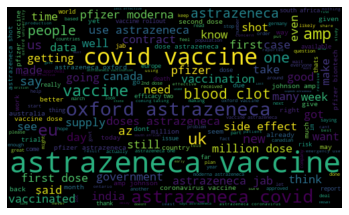

In [20]:
allWords = ''.join([twts for twts in df1['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# create a function to compute the negitive neutral and positive analysis and add it as a column in the dataframe 


In [21]:
def getAnalysis(score):
  if score < 0:
    return 'Negitive'
  elif score == 0:
    return 'Neutral'  
  else:
    return 'Positive'



df1['Sentiments'] = df1['Polarity'].apply(getAnalysis)
df1

,cleaned_tweets,Subjectivity,Polarity,Sentiments
0,astrazeneca may saving grace 2021,0.000000,0.000000,Neutral
1,astrazeneca,0.000000,0.000000,Neutral
2,ht pointing recommendations state even two vac...,0.600000,0.000000,Neutral
3,two million doses covid 19 vaccine developed o...,0.150000,0.050000,Positive
4,terms rollout depends variety factors astrazen...,0.258333,0.258333,Positive
...,...,...,...,...
28077,asked eu could refuse make final payment astra...,0.800000,0.350000,Positive
28078,says based u k hate uproar moderna yesterday s...,0.900000,-0.800000,Negitive
28079,two weeks till canada approves astrazeneca ch ...,0.000000,0.000000,Neutral
28080,boom thats along getting astrazeneca cough mon...,0.000000,0.000000,Neutral


# print all the postive tweets 


In [22]:
j =1 
sortedDF =df1.sort_values(by=['Polarity'])
for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Sentiments'][i]=='Positive'):
    print(str(j) + ')' + sortedDF['cleaned_tweets'][i])
    print()
    j= j+1


Streaming output truncated to the last 5000 lines.
9480)actually markedly false statement unknown whether would survived great unknown vaccines astrazeneca recently revised efficacy rates

9481)astrazeneca oxford university covid 19 vaccine confirmed safe efficient

9482)first astrazeneca reaction ever

9483)major supplier engagement promote stock price new highs read azn

9484)rubbish spouting astrazeneca von de layens ballsed serves right 14 million doses reason distributing

9485)feel seems astrazenecas side effects mostly affect women might contraception related problem know wouldnt feel safe vaccine anyhow still shield new strains factors

9486)yay nice congratulations

9487)worth detailed read vaccine induced prothrombotic immune thrombocytopenia vipit following astrazeneca covid 19 vaccination ontario covid 19 science advisory table

9488)denmark extends astrazeneca suspension three weeks india need vaccinate first people fast track

9489)got welcome text evening scheduled hse d

# print all the negitive tweets 


In [23]:
j =1 
sortedDF =df1.sort_values(by=['Polarity'],ascending ='False')
for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Sentiments'][i]=='Negitive'):
    print(str(j) + ')' + sortedDF['cleaned_tweets'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
2270)oops australia health minister greg hunt admitted hospital said serious condition one day receiving dose oxford astrazeneca covid vaccine

2271)couple days austria suspended astrazeneca due death amp adverse reaction

2272)dont care vaccine get ill take johnson amp johnson id take russian sputnik v id take astrazeneca last two arent approved us use vaccine prevents disease im picky via

2273)astrazeneca openly admit vax contains dna could possibly go wrong

2274)spoken lots people got poorly astrazeneca jab

2275)please let us know personal medical treatments recently sickening virtue signalling phillip schofield 58 gets covid 19 oxford astrazeneca vaccine

2276)four days since first oxford astrazeneca vaccination still feeling awful mainly fatigue headache nausea describe like morning sickness 100 pregnant

2277)chance astrazeneca one think ill wait j amp j one done shot

2278)wto astrazeneca isnt restricted uk fulfilling orders 

# get percentage of positive tweets 


In [24]:
ptweets = df1[df1.Sentiments=='Positive']
ptweets = ptweets['cleaned_tweets']

round( (ptweets.shape[0] / df1.shape[0])* 100 , 1 )

42.7

# get percentage of negitive tweets 


In [25]:
Ntweets = df1[df1.Sentiments=='Negitive']
Ntweets = Ntweets['cleaned_tweets']

round( (Ntweets.shape[0] / df1.shape[0])* 100 , 1 )

17.0

# get percentage of Neutral tweets 

In [26]:

Netweets = df1[df1.Sentiments=='Neutral']
Netweets = Netweets['cleaned_tweets']

round( (Netweets.shape[0] / df1.shape[0])* 100 , 1 )

40.4

In [27]:

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['labeled_sentiments']= label_encoder.fit_transform(df1['Sentiments'])
 



# Visualizing the Sentiment % with the help of  Pie Chart 

[42.7, 17.0, 40.4]
['Positive_Sentiments', 'Negitive_sentiments', 'Neutral_sentiments']


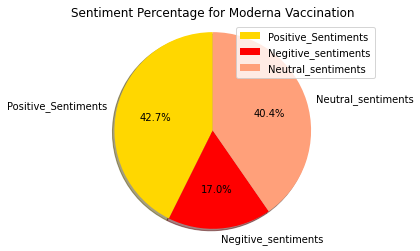

In [28]:
topic = ['Positive_Sentiments', 'Negitive_sentiments', 'Neutral_sentiments']
Postive_percentage = [42.7,17.0,40.4]


sizes = Postive_percentage
print(sizes)
labels = list(topic)
# makeitastring = ''.join(map(str, labels))
print(labels)
colors = [ 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)   #line 240
#plt.pie(sizes, labels, colors)
plt.axis('equal')
plt.title('Sentiment Percentage for Moderna Vaccination')
plt.legend()
plt.show()

# Visualizing the sentiments with the help of a bar graph

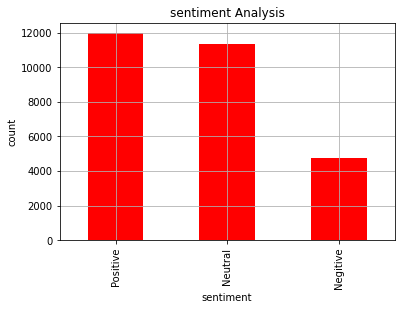

In [29]:
#show the value counts 
df1['Sentiments'].value_counts()
# plot and visualize the counts 
plt.title('sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
df1['Sentiments'].value_counts().plot(kind = 'bar',color = 'Red')
plt.grid()
plt.show()


# plotting polarity and subjectivity for the three category of tweets 

In [30]:
Positive_sent = df1[df1["Sentiments"] == 'Positive']
Negitive_sent = df1[df1["Sentiments"] == 'Negitive']
Neutral_sent = df1[df1["Sentiments"] == 'Neutral']

# Positive tweets word cloud

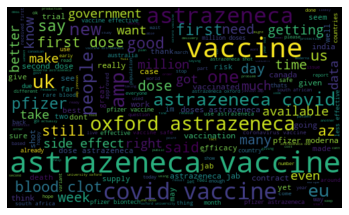

In [31]:
allWords = ''.join([twts for twts in Positive_sent['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Negitive tweets word cloud

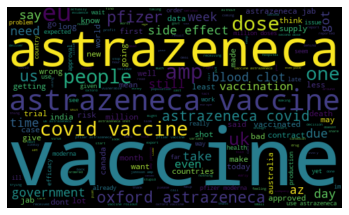

In [32]:
allWords = ''.join([twts for twts in Negitive_sent['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Neutral tweets word cloud

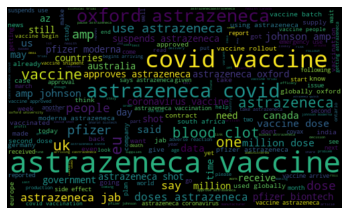

In [33]:
allWords = ''.join([twts for twts in Neutral_sent['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

#Import classification algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

#Import modules to calculate accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

 # Sentiment Analysis using Nive Biass Classifier (without tunning the hyper parameters)

In [35]:
tv = TfidfVectorizer(ngram_range=(1,3),max_features=20000,stop_words='english') 
X = tv.fit_transform(df1['cleaned_tweets'])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, df1['Sentiments'],
                                               test_size = 0.2, shuffle=True)

nb = MultinomialNB(alpha=6.5, fit_prior=False)
nb.fit(Xtrain,ytrain)
pred = nb.predict(Xtest)

print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.678298023856151
[[ 185  151  613]
 [  36 1440  819]
 [   7  181 2185]]
              precision    recall  f1-score   support

    Negitive       0.81      0.19      0.31       949
     Neutral       0.81      0.63      0.71      2295
    Positive       0.60      0.92      0.73      2373

    accuracy                           0.68      5617
   macro avg       0.74      0.58      0.58      5617
weighted avg       0.72      0.68      0.65      5617



# Sentiment Analysis based on Machine Learning  using Linear SVM 
with Grid Search Hyperparameter Tuning & 10-Fold Cross Validation 
* achieving higher accuracy over the mdoel without hyperparameter tuning

In [37]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
tuned_parameters = {
    'vect__ngram_range': [(1, 2), (1, 3), (1, 4)],
    'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__tol': [1, 1e-1, 1e-2, 1e-3]
}

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df1['cleaned_tweets'],df1['Sentiments'],
                                               test_size = 0.2, shuffle=True)

In [39]:
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))
print(accuracy_score(y_test, clf.predict(x_test)))
print(confusion_matrix(y_test, clf.predict(x_test)))

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

              precision    recall  f1-score   support

    Negitive     0.9193    0.7762    0.8417       983
     Neutral     0.9159    0.9565    0.9357      2253
    Positive     0.9166    0.9370    0.9267      2381

    accuracy                         0.9167      5617
   macro avg     0.9172    0.8899    0.9014      5617
weighted avg     0.9168    0.9167    0.9154      5617

0.9166815025814492
[[ 763   92  128]
 [  23 2155   75]
 [  44  106 2231]]
Best Score:  0.9142214552618094
Best Params:  {'clf__tol': 0.1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
